# Anomaly Detection

# Exercise 1 - Anomaly Detection using K-means Clustering

In [1]:
from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random.seed(123)
def makeData(N):
    x = []
    for i in range(N):
        a = i/1000 + random.uniform(-3, 2)
        r = random.uniform(-5, 10)
        if(r >= 9.9):
            r = r + 10
        elif(r<(-4.8)):
            r = r +(- 10)
        x.append([a + r])
    return array(x)

x = makeData(500)

# Visualize the Data

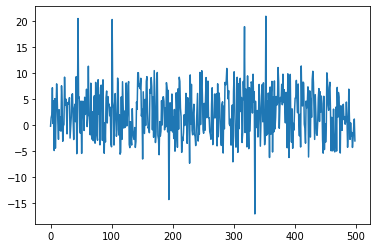

In [3]:
x_ax = range(500)
plt.plot(x_ax, x)
plt.show()


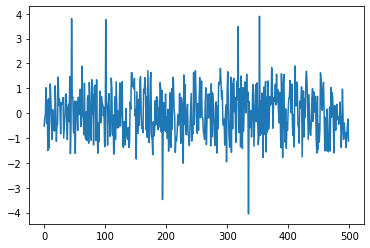

In [4]:
#In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value
# of each feature, then scale it by dividing non-constant features by their standard deviation.
x = scale(x)
plt.plot(x_ax, x)
plt.show()

In [5]:
# Apply K means clustering
kmeans = KMeans(n_clusters = 1).fit(x)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [6]:
center = kmeans.cluster_centers_
print(center)

[[-7.10542736e-17]]


In [7]:
distance = sqrt((x - center)**2)

In [8]:
order_index = argsort(distance, axis = 0)
indexes = order_index[-7:]

In [9]:
values = x[indexes]


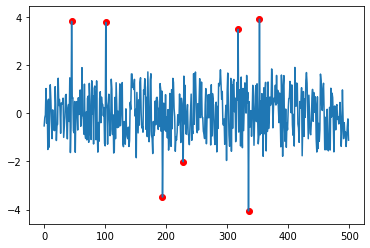

In [10]:
plt.plot(x_ax, x)
plt.scatter(indexes, values, color='r')
plt.show()

# Questions
1) Anomalies are over 1.8 and below -1.8. Update the implementation to detect the anomallies.

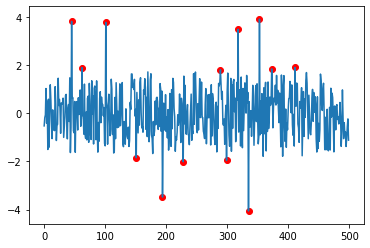

In [11]:
import pandas as pd
x_df=pd.DataFrame(x)
index_data=x_df.index
index_df=pd.DataFrame(index_data)
df=pd.concat([index_df,x_df],axis=1)
df.columns = ['index', 'value']
greater_df=df[df['value'] > 1.8]
less_df=df[df['value'] < -1.8]
anamolies=pd.concat([greater_df,less_df])
plt.plot(df['index'],df['value'])
plt.scatter(anamolies['index'], anamolies['value'], color='r')

2) Increase the dataset from 500 to 1500 and detect the anomalies (last 10 points).

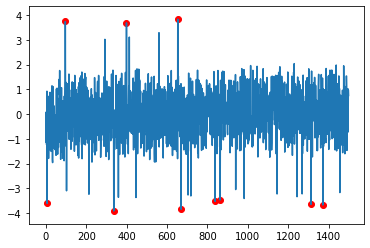

In [12]:
x = makeData(1500)
x = scale(x)
kmeans = KMeans(n_clusters = 1).fit(x)
center = kmeans.cluster_centers_
distance = sqrt((x - center)**2)
order_index = argsort(distance, axis = 0)
indexes = order_index[-10:]
values = x[indexes]
plt.plot(range(1500), x)
plt.scatter(indexes, values, color='r')
plt.show()

3) Anomalies are over 1.8 and below -1.8. Update the implementation to detect the anomallies.

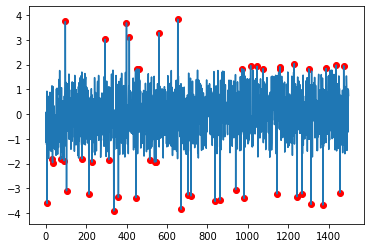

In [13]:
x_df=pd.DataFrame(x)
index_data=x_df.index
index_df=pd.DataFrame(index_data)
df=pd.concat([index_df,x_df],axis=1)
df.columns = ['index', 'value']
greater_df=df[df['value'] > 1.8]
less_df=df[df['value'] < -1.8]
anamolies=pd.concat([greater_df,less_df])
plt.plot(df['index'],df['value'])
plt.scatter(anamolies['index'], anamolies['value'], color='r')

4) Add 50 more data points randomly and detect if there is any anomaly in the added data.

5) Cluster data with K=2 clusters and find 3 far anomaly data points in each cluster.

# Exercise - 2 Anomaly Detecion in Real dataset using K-means clustering
# Testing with Boston housing dataset
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

In [14]:
# Load boston dataset
boston = load_boston()

In [15]:
y = boston.target
y = y.reshape(y.shape[0], 1)
y = scale(y)

In [16]:
kmeans = KMeans(n_clusters = 1).fit(y)
print(kmeans)

center = kmeans.cluster_centers_
print(center)

distance = sqrt((y - center)**2)
order_index = argsort(distance, axis = 0)
indexes = order_index[-25:]
values = y[indexes]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[-4.31802157e-16]]


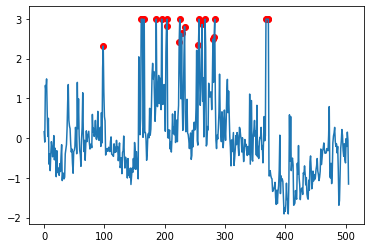

In [17]:
x_ax = range(y.shape[0])
plt.plot(x_ax, y)
plt.scatter(indexes,values, color='r')
plt.show()

# Exercise-3 Anomaly Detection using DBSCAN
*Two important parameter for dbscan epsilon and min_sample.
 epsilon=eps= redius of the cluster=distance parameter.
 min_sample=minimum number of point required for the cluster

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt

In [19]:
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

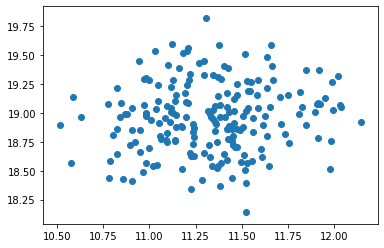

In [20]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [21]:
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan) 

DBSCAN(algorithm='auto', eps=0.28, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


In [22]:
clusters = dbscan.fit_predict(x)
print("cluster created:",str(list(set(clusters))))
# -1 is not a cluster [0, -1]

cluster created: [0, -1]


In [23]:
anom_index = where(clusters == -1)
values = x[anom_index]

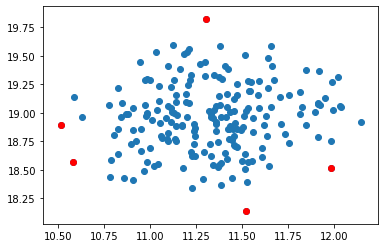

In [24]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

# Exercise
1) eps = 0.5, min_sample=20

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


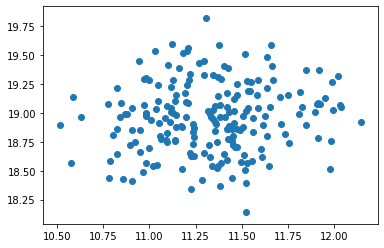

In [25]:
dbscan = DBSCAN(eps = 0.5, min_samples = 20)
print(dbscan)
pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

2) eps = 0.38, min_sample =20

DBSCAN(algorithm='auto', eps=0.38, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


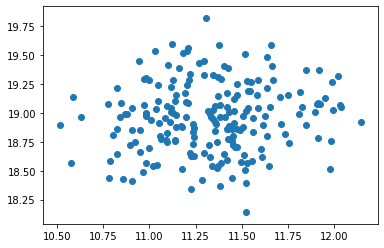

In [26]:
dbscan = DBSCAN(eps = 0.38, min_samples = 20)
print(dbscan)
pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

3) eps= 0.18, min_sample =20

DBSCAN(algorithm='auto', eps=0.18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


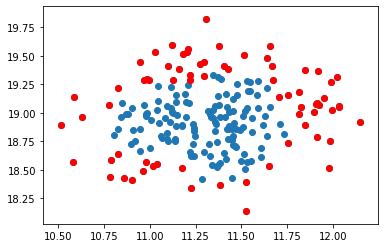

In [27]:
dbscan = DBSCAN(eps = 0.18, min_samples = 20)
print(dbscan)
pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

4) eps= 0.18, min_sample =30

DBSCAN(algorithm='auto', eps=0.18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=30, n_jobs=None, p=None)


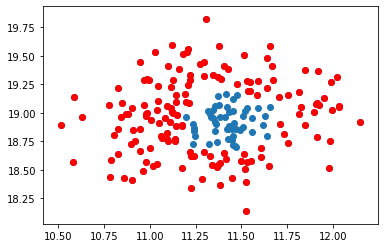

In [28]:
dbscan = DBSCAN(eps = 0.18, min_samples = 30)
print(dbscan)
pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

5) eps= 0.18, min_sample =35

DBSCAN(algorithm='auto', eps=0.18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=40, n_jobs=None, p=None)


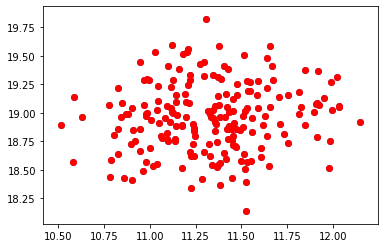

In [29]:
dbscan = DBSCAN(eps = 0.18, min_samples = 40)
print(dbscan)
pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [30]:
def plot_show(data,cluster):
    anom_index = where(clusters == -1)
    values = x[anom_index]
    plt.scatter(x[:,0], x[:,1])
    plt.scatter(values[:,0], values[:,1], color='r')
    plt.show()

Use elbow method to find optimal cluster using algorithem.

clusters created:  [0]


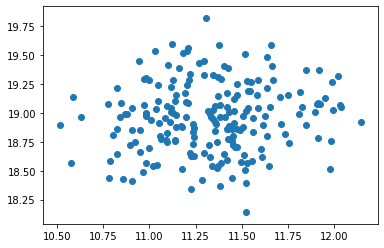

In [31]:
#Shape is matrix shape this is 200*2 matrix shape[0]=200 shape[1]=2
# 0.5 epsilon distance where each cluster contain 4 items no anomolies detected
min_sample= x.shape[1]*2
dbscan = DBSCAN(eps = 0.5, min_samples = min_sample)
clusters = dbscan.fit_predict(x)
print("clusters created: ",str(list(set(clusters))))
plot_show(x,clusters)

In [32]:
k=min_sample if min_sample > 2 else 2
nbrs=NearestNeighbors(n_neighbors=k).fit(x)
distances,indices=nbrs.kneighbors(x)
print("min sample: ",min_sample)
print("shape of distance matrix is:", distances.shape)

min sample:  4
shape of distance matrix is: (200, 4)


Use elbow method to find optimal cluster with k mean.

Text(0, 0.5, 'WCSS')

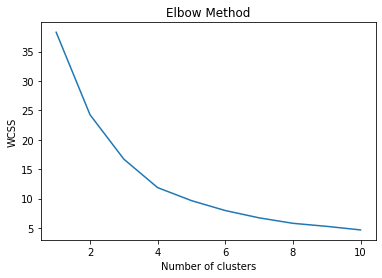

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0).fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Calculate with AIC BIC and negative log likelihood

In [34]:
from sklearn import mixture
import numpy as np

def calculate_optimum_cluster(data_point):
    shape=data_point.shape
    N=shape[0]
    D=shape[1]
    AICs=[]
    BICs=[]
    neg_log_lhs=[]
    K_cluster = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
    for K in K_cluster:
        gmm = mixture.GaussianMixture(n_components=K, n_init=10)
        gmm.fit(data_point)
        log_lh = N*gmm.score(data_point)
        ck = K*D+(K-1)+(K*D*(D+1))/2
        AIC = ck-log_lh
        BIC = ck*np.log(N)/2-log_lh
        AICs.append(AIC)
        BICs.append(BIC)
        neg_log_lhs.append(-1*log_lh)
    return neg_log_lhs, AICs, BICs

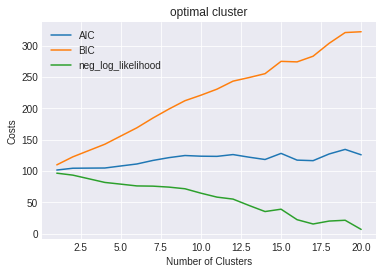

In [35]:
def plot_graph(neg_log_lhs,AICs,BICs,graph_name):
    plt.style.use('seaborn-darkgrid')
    plt.figure();
    ax1= plt.subplot(111)
    if AICs is not None:
        ax1.plot(range(1, 21), AICs, label='AIC')
    if BICs is not None:
        ax1.plot(range(1, 21), BICs, label='BIC')
    if neg_log_lhs is not None:
        ax1.plot(range(1, 21), neg_log_lhs, label='neg_log_likelihood')
    plt.title(graph_name)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Costs')
    ax1.legend()
    plt.show()

nll,aic,bic = calculate_optimum_cluster(x)
plot_graph(nll,aic,bic,"optimal cluster")

# Exercise
1) Create a data with 500 points 
2) Apply DBSCAN and K-means clustering seperately to detect the anomalies in the data.
3) Compare the Results

In [36]:
random.seed(123)
def makeData(N):
    x = []
    for i in range(N):
        a = i/1000 + random.uniform(-3, 2)
        r = random.uniform(-5, 10)
        if(r >= 9.9):
            r = r + 10
        elif(r<(-4.8)):
            r = r +(- 10)
        x.append([a + r])
    return array(x)

xk = makeData(500)

In [37]:
xd1, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

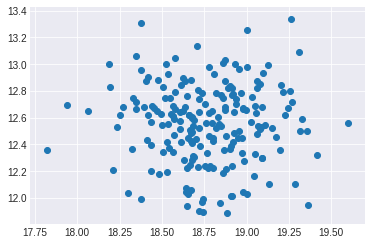

In [38]:
plt.scatter(xd1[:,0], xd1[:,1])
plt.show()

In [39]:
xdb = scale(xd1)

In [40]:
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan) 

DBSCAN(algorithm='auto', eps=0.28, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


In [41]:
anom_index = where(pred == -1)
values = xdb[anom_index]

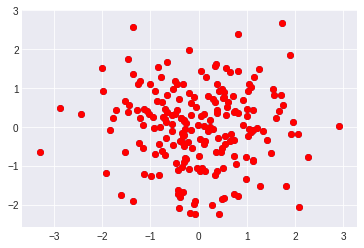

In [42]:
plt.scatter(xdb[:,0], xdb[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

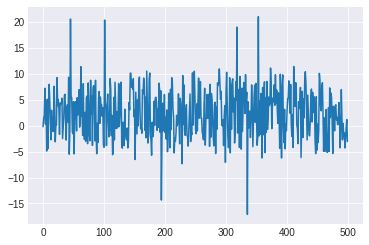

In [43]:
x_ax = range(500)
plt.plot(x_ax, xk)

In [44]:
xkm = scale(xk)

In [45]:
# Apply K means clustering
kmeans = KMeans(n_clusters = 1).fit(xkm)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [46]:
center = kmeans.cluster_centers_
print(center)

[[-7.10542736e-17]]


In [47]:
distance = sqrt((xkm - center)**2)

In [48]:
order_index = argsort(distance, axis = 0)
print(order_index)
indexes = order_index[-6:]
print("last six index")
print(indexes)

[[331]
 [234]
 [405]
 [ 79]
 [240]
 [159]
 [ 54]
 [338]
 [443]
 [153]
 [123]
 [409]
 [ 69]
 [459]
 [ 57]
 [ 64]
 [312]
 [219]
 [113]
 [  2]
 [  9]
 [400]
 [121]
 [126]
 [435]
 [432]
 [ 63]
 [ 58]
 [387]
 [339]
 [ 97]
 [341]
 [456]
 [358]
 [149]
 [257]
 [477]
 [ 14]
 [482]
 [297]
 [ 34]
 [203]
 [201]
 [214]
 [ 16]
 [142]
 [150]
 [471]
 [464]
 [369]
 [428]
 [461]
 [396]
 [103]
 [350]
 [134]
 [256]
 [260]
 [384]
 [259]
 [  1]
 [268]
 [328]
 [270]
 [107]
 [490]
 [ 26]
 [207]
 [ 39]
 [ 61]
 [486]
 [188]
 [213]
 [420]
 [267]
 [498]
 [ 98]
 [295]
 [171]
 [278]
 [468]
 [343]
 [481]
 [ 37]
 [ 52]
 [345]
 [376]
 [284]
 [413]
 [476]
 [474]
 [479]
 [484]
 [455]
 [221]
 [ 24]
 [371]
 [105]
 [298]
 [223]
 [412]
 [441]
 [ 95]
 [380]
 [179]
 [ 41]
 [131]
 [348]
 [227]
 [281]
 [480]
 [235]
 [264]
 [ 40]
 [ 96]
 [302]
 [ 29]
 [438]
 [ 12]
 [421]
 [445]
 [ 89]
 [385]
 [492]
 [ 30]
 [252]
 [ 93]
 [226]
 [372]
 [119]
 [424]
 [398]
 [ 19]
 [196]
 [  4]
 [450]
 [382]
 [ 28]
 [293]
 [230]
 [333]
 [416]
 [483]

In [49]:
values = xkm[indexes]

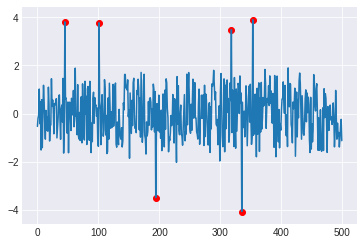

In [50]:
plt.plot(x_ax, xkm)
plt.scatter(indexes, values, color='r')
plt.show()

1) Compare two methods.